INF2178 ASSIGNMENT 1

YANYUE ZHANG

1009968340

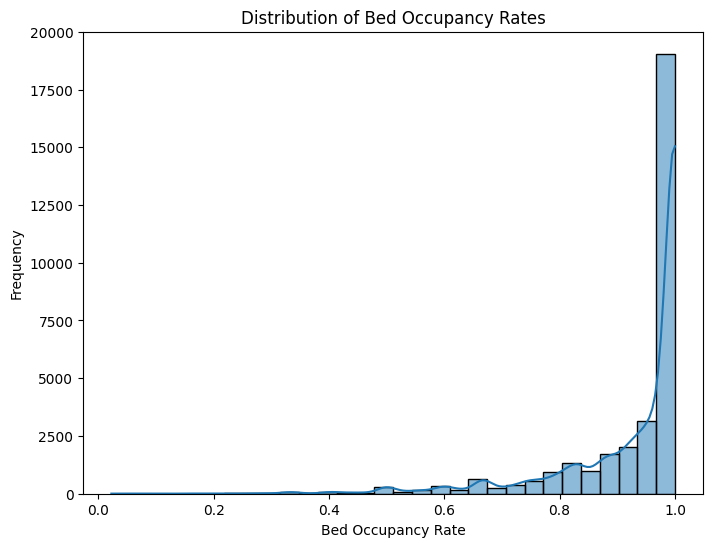

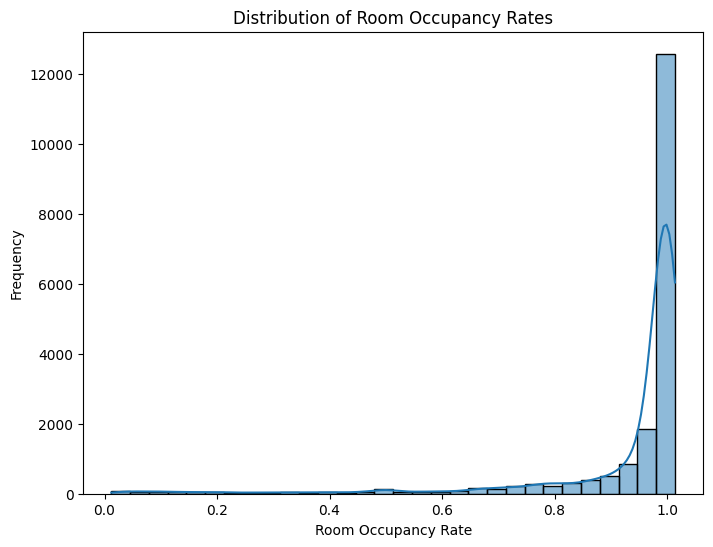

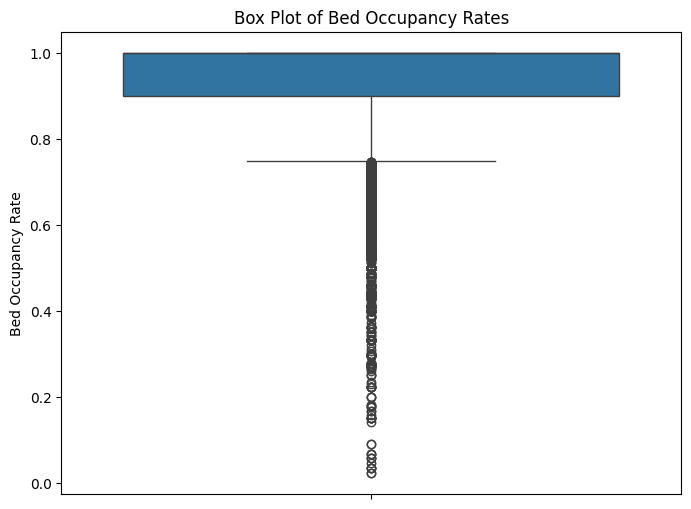

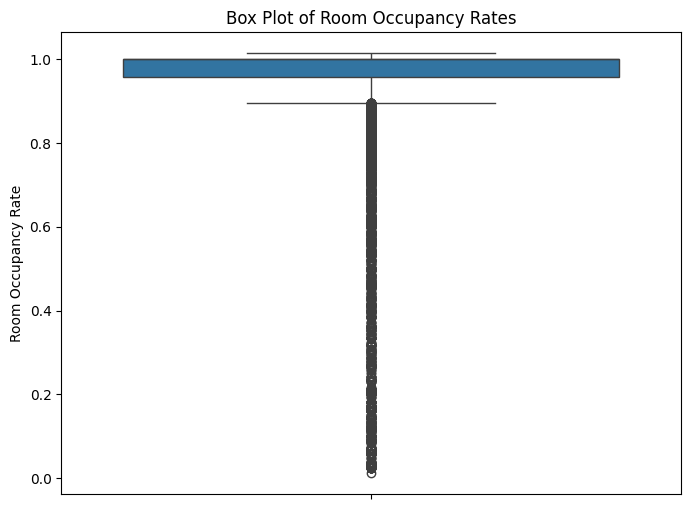

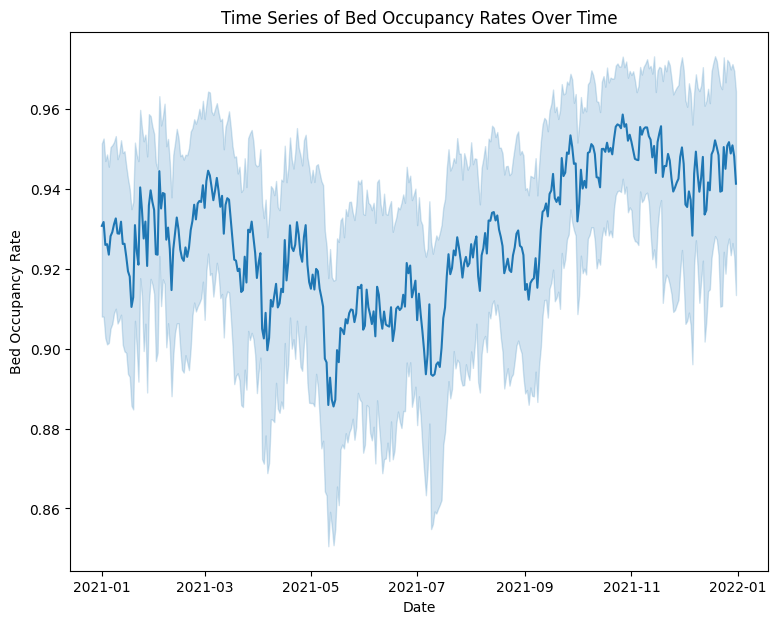

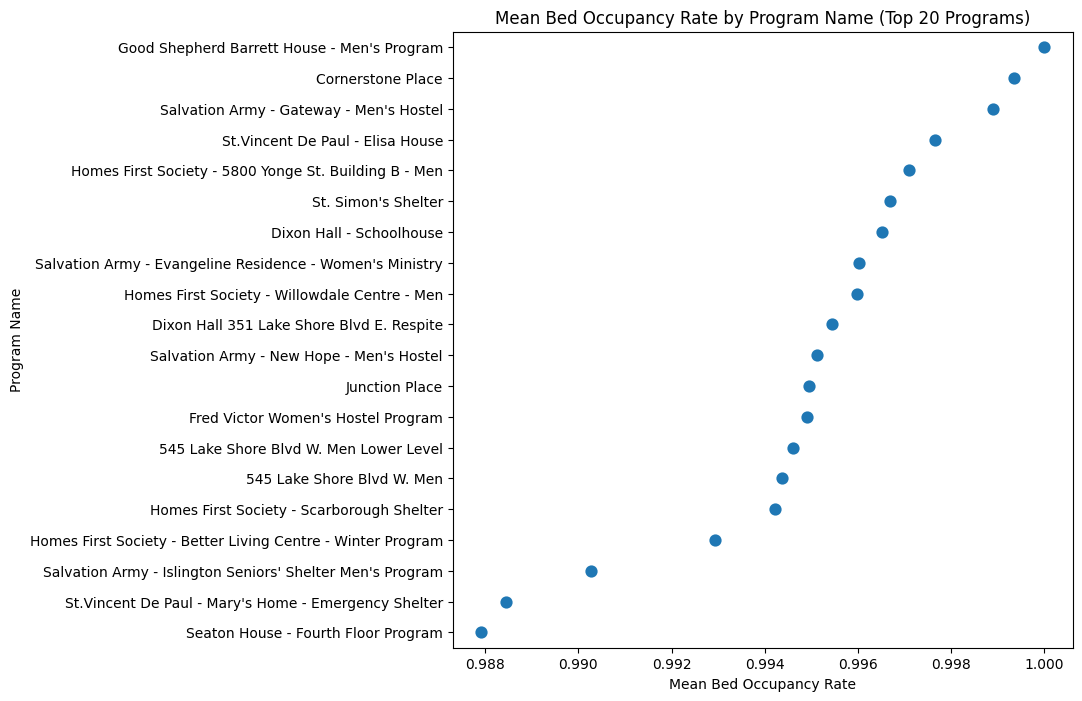

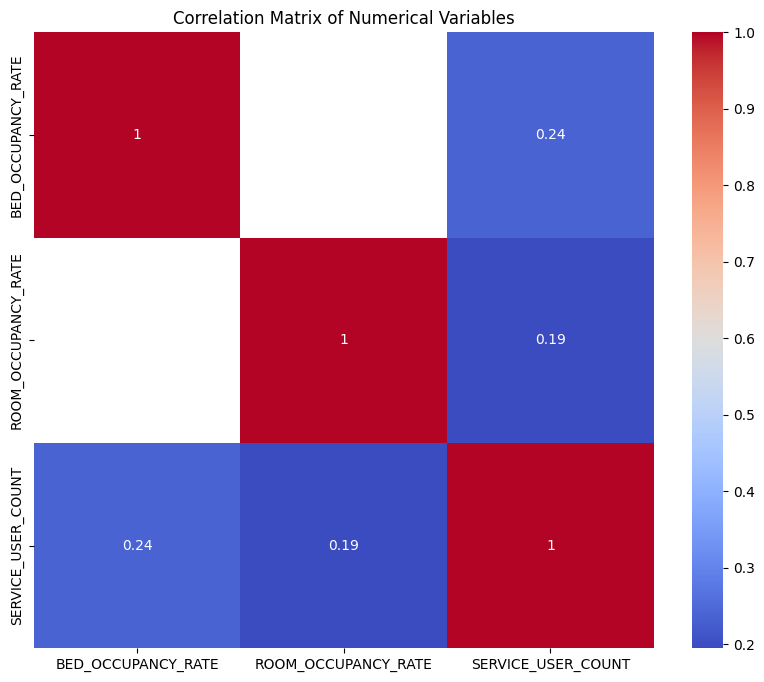

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

# Function to load and clean the data
def load_and_clean_data(file_path):
    """
    Loads and cleans the shelter data from the given file path.
    Calculates BED_OCCUPANCY_RATE and ROOM_OCCUPANCY_RATE.
    Handles missing values and infinities.
    Adds a time-based categorical variable 'TIME_PERIOD'.
    """
    # Load the data using pandas
    shelter_data = pd.read_excel(file_path)

    # Calculate occupancy rates
    shelter_data['BED_OCCUPANCY_RATE'] = shelter_data['OCCUPIED_BEDS'] / shelter_data['CAPACITY_ACTUAL_BED']
    shelter_data['ROOM_OCCUPANCY_RATE'] = shelter_data['OCCUPIED_ROOMS'] / shelter_data['CAPACITY_ACTUAL_ROOM']

    # Replace infinities with NaN if there's division by zero
    shelter_data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Create a time-based categorical variable for the year 2021
    shelter_data['TIME_PERIOD'] = shelter_data['OCCUPANCY_DATE'].apply(lambda x: 'First Half' if x.month <= 6 else 'Second Half')

    # Handle missing values for categorical columns by filling them with the mode
    for column in ['PROGRAM_NAME', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA']:
        mode_value = shelter_data[column].mode()[0]
        shelter_data[column].fillna(mode_value, inplace=True)

    # Convert categorical columns to 'category' data type
    categorical_columns = ['ORGANIZATION_NAME', 'SECTOR', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA', 'CAPACITY_TYPE']
    for column in categorical_columns:
        shelter_data[column] = shelter_data[column].astype('category')

    return shelter_data

# Function to visualize the data
def visualize_data(shelter_data):
    """
    Generates various plots to visualize the shelter data.
    Includes histograms, box plots, time series line plot, dot plot, and correlation matrix.
    """
    # Histograms and Density Plots for Bed and Room Occupancy Rates
    plt.figure(figsize=(8, 6))
    sns.histplot(shelter_data['BED_OCCUPANCY_RATE'], kde=True, bins=30)
    plt.title('Distribution of Bed Occupancy Rates')
    plt.xlabel('Bed Occupancy Rate')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.histplot(shelter_data['ROOM_OCCUPANCY_RATE'], kde=True, bins=30)
    plt.title('Distribution of Room Occupancy Rates')
    plt.xlabel('Room Occupancy Rate')
    plt.ylabel('Frequency')
    plt.show()

    # Box Plots for Bed and Room Occupancy Rates
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=shelter_data, y='BED_OCCUPANCY_RATE')
    plt.title('Box Plot of Bed Occupancy Rates')
    plt.ylabel('Bed Occupancy Rate')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=shelter_data, y='ROOM_OCCUPANCY_RATE')
    plt.title('Box Plot of Room Occupancy Rates')
    plt.ylabel('Room Occupancy Rate')
    plt.show()

    # Time Series Line Plot for Bed Occupancy Rates
    shelter_data.sort_values('OCCUPANCY_DATE', inplace=True)
    plt.figure(figsize=(9, 7))
    sns.lineplot(data=shelter_data, x='OCCUPANCY_DATE', y='BED_OCCUPANCY_RATE')
    plt.title('Time Series of Bed Occupancy Rates Over Time')
    plt.xlabel('Date')
    plt.ylabel('Bed Occupancy Rate')
    plt.show()

    # Dot Plot for Mean Bed Occupancy Rate of Top 20 Programs
    program_occupancy_rates = shelter_data.groupby('PROGRAM_NAME')['BED_OCCUPANCY_RATE'].mean()
    top_programs = program_occupancy_rates.nlargest(20)
    plt.figure(figsize=(8, 8))
    sns.pointplot(y=top_programs.index, x=top_programs.values, linestyle='none')
    plt.title('Mean Bed Occupancy Rate by Program Name (Top 20 Programs)')
    plt.xlabel('Mean Bed Occupancy Rate')
    plt.ylabel('Program Name')
    plt.show()

    # Correlation Matrix of Numerical Variables
    numerical_columns = ['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE', 'SERVICE_USER_COUNT']
    correlation_matrix = shelter_data[numerical_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.show()

# Main execution
file_path = 'INF2178_A1_data.xlsx'
shelter_data = load_and_clean_data(file_path)
visualize_data(shelter_data)

In [ ]:

def compare_groups_and_summarize(data, group_column, numeric_column):

    """
    Compares numerical data across different groups of a categorical column and summarizes the results.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    group_column (str): The name of the categorical column for grouping the data.
    numeric_column (str): The name of the numerical column to compare across the groups.
    """

    # Obtain unique groups in the categorical column
    unique_groups = data[group_column].dropna().unique()

    # Iterate through each pair of groups for comparison
    for i in range(len(unique_groups)):
        for j in range(i+1, len(unique_groups)):
            # Extract data for each group
            group1 = data[data[group_column] == unique_groups[i]][numeric_column].dropna()
            group2 = data[data[group_column] == unique_groups[j]][numeric_column].dropna()

            # Perform t-test between the two groups
            t_test_result = ttest_ind(group1, group2, nan_policy='omit')

            # Output the t-test result
            print(f"T-test between {unique_groups[i]} and {unique_groups[j]}:")
            print("Statistic:", t_test_result.statistic)
            print("P-value:", t_test_result.pvalue)

            # Print summary statistics for each group
            print(f"\nSummary Statistics for {unique_groups[i]}:")
            get_summary_statistics(group1)
            print(f"\nSummary Statistics for {unique_groups[j]}:")
            get_summary_statistics(group2)
            print("\n" + "-"*50 + "\n")

def get_summary_statistics(dataset):
    """
    Calculates and prints the summary statistics for a given dataset.

    Parameters:
    dataset (Series): A pandas Series for which the summary statistics are calculated.
    """
    # Calculate summary statistics
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    iqr = np.round(quartile_3 - quartile_1, 2)

    # Print the summary statistics
    print('Min:', min_value)
    print('Mean:', mean)
    print('Max:', max_value)
    print('25th percentile:', quartile_1)
    print('Median:', median)
    print('75th percentile:', quartile_3)
    print('Interquartile range (IQR):', iqr)

# Load the dataset
data = pd.read_excel('cleaned_INF2178_A1_data.xlsx')

# Compare and summarize groups in 'CAPACITY_TYPE' and 'PROGRAM_MODEL' categories
print("Comparing CAPACITY_TYPE Categories")
compare_groups_and_summarize(data, 'CAPACITY_TYPE', 'SERVICE_USER_COUNT')

print("\nComparing PROGRAM_MODEL Categories")
compare_groups_and_summarize(data, 'PROGRAM_MODEL', 'SERVICE_USER_COUNT')


Comparing CAPACITY_TYPE Categories
T-test between Room Based Capacity and Bed Based Capacity:
Statistic: 97.1228806296218
P-value: 0.0

Summary Statistics for Room Based Capacity:
Min: 1
Mean: 73.59
Max: 339
25th percentile: 22.0
Median: 47.0
75th percentile: 96.0
Interquartile range (IQR): 74.0

Summary Statistics for Bed Based Capacity:
Min: 1
Mean: 29.78
Max: 234
25th percentile: 14.0
Median: 23.0
75th percentile: 41.0
Interquartile range (IQR): 27.0

--------------------------------------------------


Comparing PROGRAM_MODEL Categories
T-test between Emergency and Transitional:
Statistic: 29.934996556844595
P-value: 3.4213002380216537e-195

Summary Statistics for Emergency:
Min: 1
Mean: 49.06
Max: 339
25th percentile: 16.0
Median: 33.0
75th percentile: 53.0
Interquartile range (IQR): 37.0

Summary Statistics for Transitional:
Min: 1
Mean: 30.99
Max: 221
25th percentile: 12.0
Median: 23.0
75th percentile: 33.0
Interquartile range (IQR): 21.0

---------------------------------------